In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load data


In [142]:
df= pd.read_excel('/content/ANZ_dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [143]:
df.columns
df['merchant_state'].unique()

array(['QLD', 'NSW', nan, 'VIC', 'WA', 'SA', 'NT', 'TAS', 'ACT'],
      dtype=object)

In [144]:
#df.info()
df.isna().any()

status               False
card_present_flag     True
bpay_biller_code      True
account              False
currency             False
long_lat             False
txn_description      False
merchant_id           True
merchant_code         True
first_name           False
balance              False
date                 False
gender               False
age                  False
merchant_suburb       True
merchant_state        True
extraction           False
amount               False
transaction_id       False
country              False
customer_id          False
merchant_long_lat     True
movement             False
dtype: bool

In [145]:
#dropping unncessary columns
df_tmp = df.drop(['status','bpay_biller_code','long_lat','txn_description','merchant_id','merchant_code','merchant_suburb','extraction','transaction_id','customer_id','merchant_long_lat'],axis=1)
df_tmp.head()

,card_present_flag,account,currency,first_name,balance,date,gender,age,merchant_state,amount,country,movement
0,1.0,ACC-1598451071,AUD,Diana,35.39,2018-08-01,F,26,QLD,16.25,Australia,debit
1,0.0,ACC-1598451071,AUD,Diana,21.20,2018-08-01,F,26,NSW,14.19,Australia,debit
2,1.0,ACC-1222300524,AUD,Michael,5.71,2018-08-01,M,38,NSW,6.42,Australia,debit
3,1.0,ACC-1037050564,AUD,Rhonda,2117.22,2018-08-01,F,40,QLD,40.90,Australia,debit
4,1.0,ACC-1598451071,AUD,Diana,17.95,2018-08-01,F,26,QLD,3.25,Australia,debit


In [0]:
df_tmp.drop(['account'],axis=1,inplace=True)

In [147]:
#exctracting month from transection date
def extract_month(value):
  return value.month
df_tmp['trnsc_month']=df_tmp['date'].apply(extract_month)
df_tmp.head()

,card_present_flag,currency,first_name,balance,date,gender,age,merchant_state,amount,country,movement,trnsc_month
0,1.0,AUD,Diana,35.39,2018-08-01,F,26,QLD,16.25,Australia,debit,8
1,0.0,AUD,Diana,21.20,2018-08-01,F,26,NSW,14.19,Australia,debit,8
2,1.0,AUD,Michael,5.71,2018-08-01,M,38,NSW,6.42,Australia,debit,8
3,1.0,AUD,Rhonda,2117.22,2018-08-01,F,40,QLD,40.90,Australia,debit,8
4,1.0,AUD,Diana,17.95,2018-08-01,F,26,QLD,3.25,Australia,debit,8


In [151]:
#grouping by transection month finding avg debit and credit amount per month
df_trnsc_cust = df_tmp.groupby(by=['trnsc_month'])['amount'].mean().reset_index()
df_trnsc_cust.head()

,trnsc_month,amount
0,8,185.121867
1,9,182.045903
2,10,196.427323


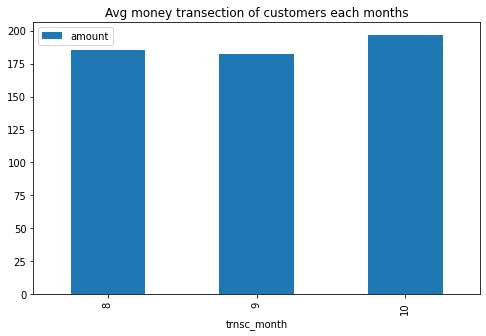

In [152]:
fig,ax = plt.subplots(facecolor='w',figsize=(8,5))
df_trnsc_cust.plot(x='trnsc_month',y='amount',kind='bar',title='Avg money transection of customers each months',ax=ax);

In [75]:
df_expnd_month=pd.DataFrame(df_trnsc_cust[df_trnsc_cust['movement']=='debit'],columns=['first_name','trnsc_month','amount'])
df_expnd_month.head()

,first_name,trnsc_month,amount
1,Abigail,8,1179.39
3,Abigail,9,1536.66
5,Abigail,10,1690.46
7,Alexander,8,1611.48
9,Alexander,9,2537.45


In [76]:
df_expnd_month = df_expnd_month.groupby(by=['trnsc_month'])['amount'].mean().reset_index()
df_expnd_month.head()

,trnsc_month,amount
0,8,2126.514875
1,9,2674.432500
2,10,2532.894500


In [77]:
df_expnd_month.rename({'amount':'expenditure'},axis=1,inplace=True)
df_credit_month=pd.DataFrame(df_trnsc_cust[df_trnsc_cust['movement']=='credit'],columns=['first_name','trnsc_month','amount'])
df_credit_month = df_credit_month.groupby(by=['trnsc_month'])['amount'].mean().reset_index()
df_credit_month.rename({'amount':'credit'},axis=1,inplace=True)
df_credit_month.head()

,trnsc_month,credit
0,8,7086.257342
1,9,6539.184937
2,10,7502.086375


In [94]:
df_expn_credit = pd.concat([df_expnd_month,df_credit_month['credit']],axis=1).reindex(df_expnd_month.index)
df_expn_credit.head()

,trnsc_month,expenditure,credit
0,8,2126.514875,7086.257342
1,9,2674.432500,6539.184937
2,10,2532.894500,7502.086375


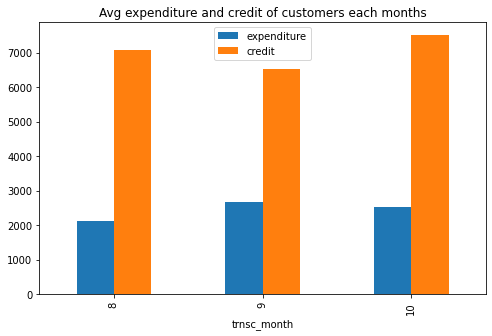

In [139]:
fig,ax = plt.subplots(facecolor='w',figsize=(8,5))
df_expn_credit.plot(x='trnsc_month',y=['expenditure','credit'],kind='bar',title='Avg expenditure and credit of customers each months',ax=ax);

In [103]:
#finding avg cost of any user per day
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [122]:
df['merchant_state'].notna().sum()

7717

In [153]:
df_day_trnsc = pd.DataFrame(df[df['merchant_state'].notna()],columns=['first_name','balance','date','gender','age','merchant_suburb','merchant_state','amount','movement'])
df_day_last=df_day_trnsc.groupby(by=['date','merchant_state'])['amount'].mean().reset_index()
df_day_last=df_day_last.groupby(by=['merchant_state'])['amount'].mean().reset_index()
df_day_last

,merchant_state,amount
0,ACT,52.012410
1,NSW,46.686149
2,NT,39.334737
3,QLD,32.531237
4,SA,38.880385
5,TAS,30.352462
6,VIC,42.793403
7,WA,29.918499


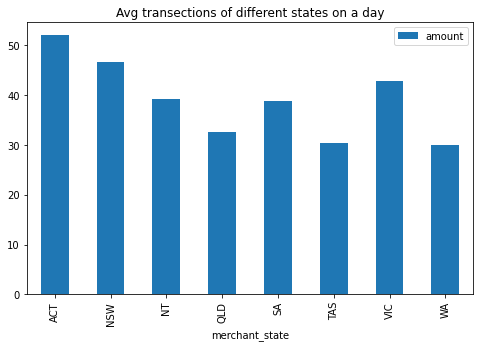

In [154]:
fig,ax = plt.subplots(facecolor='w',figsize=(8,5))
df_day_last.plot(x='merchant_state',y='amount',kind='bar',title='Avg transections of different states on a day',ax=ax);